In [2]:
from bs4 import BeautifulSoup
import urllib.request as req
from selenium import webdriver
import pandas as pd
import re

In [3]:
driver=webdriver.Chrome("chromedriver.exe")


In [4]:

url="https://www.melon.com/chart/index.htm"
# url="https://www.naver.com/chart/index.htm"
driver.get(url)
html=driver.page_source

In [5]:
soup=BeautifulSoup(html, 'html.parser')
len(soup.select("tr"))

101

In [6]:
songs=soup.select("tr")[1:] #타이틀 제외하고 100곡 저장
song=songs[0]
title=song.select("a")
print(len(title))
print(title)

len(song.select('span'))
print(song.select('span > a')[0].string)

len(song.select("div"))
print(song.select("div.ellipsis.rank01 > span > a")[0].text)
print(song.select("div.ellipsis.rank02 > span > a")[0].text)

10
[<a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('10646395');" title="Stay">
<img alt="Stay - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/106/46/395/10646395_20210707141710_500.jpg/melon/resize/120/quality/80/optimize" width="60"/>
<span class="bg_album_frame"></span>
</a>, <a class="btn button_icons type03 song_info" href="javascript:melon.link.goSongDetail('33658563');" title="STAY 곡정보"><span class="none">곡정보</span></a>, <a href="javascript:melon.play.playSong('1000002721',33658563);" title="STAY 재생">STAY</a>, <a href="javascript:melon.link.goArtistDetail('2743730');" title="The Kid LAROI - 페이지 이동">The Kid LAROI</a>, <a href="javascript:melon.link.goArtistDetail('420621');" title="Justin Bieber - 페이지 이동">Justin Bieber</a>, <a href="javascript:melon.link.goArtistDetail('2743730');" title="The Kid LAROI - 페이지 이동">The Kid LAROI</a>, <a href="javascript:melon.link.goArtistDetail('420621');" title="J

In [7]:
# 바라만 본다 - MSG워너비(M.O.M)
# Next Level - aespa
# ...

for song in songs[:30]:
    print(song.select('span > a')[0].string, '-', song.select('div.ellipsis.rank02 > a')[0].string)


STAY - The Kid LAROI
신호등 - 이무진
My Universe - Coldplay
Permission to Dance - 방탄소년단
OHAYO MY NIGHT - 디핵 (D-Hack)
Next Level - aespa
Butter - 방탄소년단
바라만 본다 - MSG워너비(M.O.M)
Weekend - 태연 (TAEYEON)
낙하 (with 아이유) - AKMU (악뮤)
Dynamite - 방탄소년단
좋아좋아 - 조정석
Peaches (Feat. Daniel Caesar & Giveon) - Justin Bieber
Queendom - Red Velvet (레드벨벳)
DUMB DUMB - 전소미
Bad Habits - Ed Sheeran
다정히 내 이름을 부르면 - 경서예지
시간을 거슬러 (낮에 뜨는 달 X 케이윌) - 케이윌
헤픈 우연 - 헤이즈 (Heize)
이제 나만 믿어요 - 임영웅
가을 타나 봐 - 이무진
Sticker - NCT 127
비와 당신 - 이무진
롤린 (Rollin') - 브레이브걸스
Savage Love (Laxed - Siren Beat) (BTS Remix) - Jawsh 685
Dun Dun Dance - 오마이걸 (OH MY GIRL)
라일락 - 아이유
별빛 같은 나의 사랑아 - 임영웅
작은 것들을 위한 시 (Boy With Luv) (Feat. Halsey) - 방탄소년단
고백 - 멜로망스


In [8]:
###멜론 클롤링 -> 엑셀 저장 -> pandas

driver = webdriver.Chrome('chromedriver.exe')
url = 'http://www.melon.com/chart/index.htm'
driver.get(url)     

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')  

In [9]:
song_data = []
rank = 1

songs = soup.select('table > tbody > tr')
for song in songs:                                        
    title = song.select('div.rank01 > span > a')[0].text
    singer = song.select('div.rank02 > a')[0].text
    song_data.append(['Melon', rank, title, singer])
    rank = rank + 1

In [10]:
song_data #리스트의 리스트

# dataframe 저장
data=pd.DataFrame(song_data, columns=['멜론', '순위', '제목', '가수'])
print(data.head(10))

data.to_excel("melon.xlsx", index=False)

      멜론  순위                   제목             가수
0  Melon   1                 STAY  The Kid LAROI
1  Melon   2                  신호등            이무진
2  Melon   3          My Universe       Coldplay
3  Melon   4  Permission to Dance          방탄소년단
4  Melon   5       OHAYO MY NIGHT    디핵 (D-Hack)
5  Melon   6           Next Level          aespa
6  Melon   7               Butter          방탄소년단
7  Melon   8               바라만 본다  MSG워너비(M.O.M)
8  Melon   9              Weekend   태연 (TAEYEON)
9  Melon  10        낙하 (with 아이유)      AKMU (악뮤)


In [11]:
# 유튜브 데이터 추출
browser=webdriver.Chrome("chromedriver.exe")

## 유투브 랭킹 사이트
url="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube"
browser.get(url)
html=browser.page_source
soup=BeautifulSoup(html, 'html.parser')
channelList=soup.select("tr")
channelList=channelList[1:101] #제목, 사이트 정보 제거하고 

# 순수 랭킹 데이터만 추출하여 저장
channel=channelList[0]
len(channelList)


100

In [12]:
category=channel.select("p.category")[0].text.strip()
title=channel.select("h1 > a")[0].text.strip()

subscriber=channel.select(".subscriber_cnt")[0].text
view=channel.select(".view_cnt")[0].text
video=channel.select(".video_cnt")[0].text
# <td class="subscriber_cnt">6320만</td>
# <td class="view_cnt">186억2604만</td>
# <td class="video_cnt">364개</td>

for ch in channelList:
    category=ch.select("p.category")[0].text.strip()
    title=ch.select("h1 > a")[0].text.strip()
    subscriber=ch.select(".subscriber_cnt")[0].text
    view=ch.select(".view_cnt")[0].text
    video=ch.select(".video_cnt")[0].text
    print(title, category, subscriber, view,video)

BLACKPINK [음악/댄스/가수] 6720만 199억1704만 388개
HYBE LABELS [음악/댄스/가수] 6150만 193억9727만 671개
BANGTANTV [음악/댄스/가수] 5840만 129억4018만 1,609개
SMTOWN [음악/댄스/가수] 2880만 222억9875만 3,742개
Boram Tube Vlog [보람튜브 브이로그] [키즈/어린이] 2650만 110억5288만 223개
1MILLION Dance Studio [음악/댄스/가수] 2430만 67억8025만 3,066개
1theK (원더케이) [음악/댄스/가수] 2340만 208억8758만 15,227개
JYP Entertainment [음악/댄스/가수] 2210만 141억1101만 1,375개
Coldplay [미분류] 2000만 129억4711만 285개
Mnet K-POP [음악/댄스/가수] 1860만 134억1184만 26,209개
JFlaMusic [음악/댄스/가수] 1730만 34억5075만 279개
KBS WORLD TV [TV/방송] 1680만 125억5980만 52,959개
officialpsy [음악/댄스/가수] 1510만 87억0061만 91개
Jane ASMR 제인 [음식/요리/레시피] 1440만 50억6182만 1,227개
BIGBANG [음악/댄스/가수] 1380만 67억3586만 773개
TWICE [음악/댄스/가수] 1170만 23억0920만 602개
Nao FunFun [키즈/어린이] 1070만 413만 34개
Hongyu ASMR 홍유 [음식/요리/레시피] 1050만 29억2858만 397개
Stone Music Entertainment [음악/댄스/가수] 1000만 79억9653만 8,074개
DuDuPopTOY [키즈/어린이] 994만 44억2393만 1,806개
핑크퐁 (인기 동요・동화) [키즈/어린이] 963만 57억9176만 2,272개
MBCkpop [TV/방송] 948만 74억6240만 40,913개
Larva TUBA [키즈/어린이

#### URL의 구성요소 및 GET, POST 방식의 차이점 
* 소스코드를 통해 두가지 방식을 확인해 보았다. 차이점에 대해 정리를 해보면 이렇다.

---
* <GET 방식>
 * 입력한 데이터를 URL에 붙여서 전송한다. 데이터가 다 보이므로 보안에 취약하다.
 * 전송할 수 있는 데이터는 256바이트를 넘을 수 없다.
 * 전송속도는 POST방식 보다 빠르다.
* ① URL에 같이 붙여서 넘겨주는 방식
* ② 데이터의 길이가 한정 되어 있음(255byte)
* ③ 보안에 취약함(URL에 보임)
* ④ 기본적으로 한글이 잘 전송됨

---
*<POST방식>
 * 입력한 데이터를 본문안에 포함해서 전송한다.
 * 입력한 데이터가 URL에 보이지 않으므로 GET방식 보다 보안에 우수하다.
 * 전송할 데이터의 길이에 제한이 없다.
 * 복잡한 형태의 데이터를 전송할 때 유용하다.
* ​① HTTP 헤더에 붙여서 포장 되어 값이 넘어감
* ② 데이터를 숨길 수 있음(URL에 보이지 않음)
* ③ 대용량을 보낼때 사용
* ④ 기본적으로 한글이 깨짐

---
* 출처: https://all-record.tistory.com/100 [세상의 모든 기록]
* 출처: https://all-record.tistory.com/100 [세상의 모든 기록]
* https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=sthox18&logNo=221208268060

In [13]:
# page 변경 방법 / Get 방식 파라미터 넘겨주기  
page=1
url="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={}".format(page)
url

'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1'

In [14]:
import time


# chromedriver 페이지 이동
data=[]
for page in range(1,11):
    url="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={}".format(page)
    #print(url)
    browser.get(url) #서버 접속하여 페이지를 가져옴(2초 이내에)
    time.sleep(2)
    #여러 페이지를 읽을때 주의, 인위적으로 delay
    html=browser.page_source #가져온 페이지의 소스코드를 저장
    soup=BeautifulSoup(html, 'html.parser')
    channelList=soup.select("tr")
    channelList=channelList[1:101] 
    for ch in channelList:
        category=ch.select("p.category")[0].text.strip()
        title=ch.select("h1 > a")[0].text.strip()
        subscriber=ch.select(".subscriber_cnt")[0].text
        view=ch.select(".view_cnt")[0].text
        video=ch.select(".video_cnt")[0].text
        data.append([title, category, subscriber, view, video])
        #print(title, category, subscriber, view,video)
        
    #print("-"*100)    

In [15]:
data[999]
df=pd.DataFrame(data)
df.columns=['title','category','subscriber','view','video']
df.to_excel("youtube_rank.xlsx", index=False)

In [16]:
#sns data 추출
#인스타그램

driver=webdriver.Chrome("chromedriver.exe")
driver.get("https://www.instagram.com")
time.sleep(2)

email="01092293218"
inputId=driver.find_elements_by_css_selector("#loginForm > div > div > div > label > input")[0]
inputId.clear()
inputId.send_keys(email)

password="@thswnstn87"
inputPw=driver.find_elements_by_css_selector("#loginForm > div > div > div > label > input")[1]
inputPw.clear()                               
inputPw.send_keys(password)
inputPw.submit()
time.sleep(2)

In [20]:
word="울릉도맛집"
url="https://www.instagram.com/explore/tags/"+ word
driver.get(url)


In [21]:
first=driver.find_element_by_css_selector("div._9AhH0")
first.click()
time.sleep(2)
#react-root > section > main > article > div.EZdmt > div > div > div > div > a > div.eLAPa > div._9AhH0

right=driver.find_element_by_css_selector("a._65Bje.coreSpriteRightPaginationArrow")
right.click()
time.sleep(2)

In [ ]:
#인스타그램 접속(아이디/비밀번호) -> 검색어 : 칸쿤 맛집 -> 

# 첫번째 검색 페이지에서 좋아요, 작성일 추출 -> 출력
#adv.  5개 페이지에 대해서 동일한 작업 수행

In [22]:
def insta_searching(word):    
    url = 'https://www.instagram.com/explore/tags/' + word
    return url 

def select_first(driver):
    time.sleep(3)
    first = driver.find_element_by_css_selector("div._9AhH0")
    first.click()
    time.sleep(3)  


In [25]:
word = "제주도맛집"
url = insta_searching(word)
driver.get(url)
time.sleep(2)

select_first(driver)

In [26]:
#모든 게시물에 대해 공통적으로 작업
#html페이지 가져오기
#본문 가져오기
#해시태그 가져오기
#작성일자 가져오기

#  샵(#)기호로 시작하는 해시태그를 추출하여 리스트에 저장
def getContent(driver):
    html=driver.page_source
    soup=BeautifulSoup(html, 'html.parser')
    content=soup.select("div.C4VMK")[0].text
    tags = re.findall("#\w+", content)
    #tags=re.findall("[#][ㄱ-힣A-Za-z]+",content)
    #tags=re.findall("#[\w]+[ ]*", content)
    #print(tags)
    
    #print(soup.select("time.FH9sR.Nzb55")[0])
    #print(soup.select("time._1o9PC.Nzb55")[0].attrs['datetime'][:10])
    date=soup.select("time._1o9PC.Nzb55")[0]['datetime'][:10]#type:str
    
    #print(soup.select("div.C4VMK")[0].text)
    #print(soup)    
    data=[content, tags, date]
    return data #본문,해시태그,작성일자

In [27]:
getContent(driver)

['jejuyogi_.🔥산방산 돗통🔥솥뚜껑에 흑돼지 한번 구어먹어봤어?안먹어 봤으면 말을 말어~~ 완젼 끝내준다니깐!!? 한번 드셔볼텨??주소:제주 서귀포시 안덕면 사계북로 41번길189..#제주맛집 #제주도맛집 #제주공항근처맛집 #제주시맛집 #애월맛집 #중문맛집 #제주공항맛집 #서귀포맛집 #산방산맛집 #신제주맛집 #제주시청맛집 #제주애월맛집 #월정리맛집 #제주여행 #제주핫플10시간',
 ['#제주맛집',
  '#제주도맛집',
  '#제주공항근처맛집',
  '#제주시맛집',
  '#애월맛집',
  '#중문맛집',
  '#제주공항맛집',
  '#서귀포맛집',
  '#산방산맛집',
  '#신제주맛집',
  '#제주시청맛집',
  '#제주애월맛집',
  '#월정리맛집',
  '#제주여행',
  '#제주핫플10시간'],
 '2021-09-25']

In [28]:
# 
def move_next(driver):
    right = driver.find_element_by_css_selector ('a.coreSpriteRightPaginationArrow')
    right.click()
    time.sleep(3)

move_next(driver)

In [29]:
word = "제주도맛집"   
url = insta_searching(word)
driver.get(url)
time.sleep(3)
select_first(driver)

results = [ ]
target = 50 

for i in range(target):
    try:
        data = getContent(driver) #웹페이지 -> 소스코드 읽어오게 됨
        results.append(data)
        move_next(driver)
    except:
        time.sleep(1) #일단 좀 쉬다가...
        print("예외발생!")
        move_next(driver) #그냥 다음 페이지로 이동해
#다른 외부 요인(ex. 네트워크 문제 등)에 의해 게시글 읽어들이는 과정에서 에러가 발생할 수도 있음
#이런 경우를 예외상황 이라고 함.
#예외 처리 : 예외 상황을 미리 예상하여 대처하도록 하는 것
#try:
#      예외상황이 발생할 여지가 있는 코드  
#except:
#     예외 상황 처리 코드
print(results[:3])

예외발생!
[['jejuyogi_.🔥산방산 돗통🔥솥뚜껑에 흑돼지 한번 구어먹어봤어?안먹어 봤으면 말을 말어~~ 완젼 끝내준다니깐!!? 한번 드셔볼텨??주소:제주 서귀포시 안덕면 사계북로 41번길189..#제주맛집 #제주도맛집 #제주공항근처맛집 #제주시맛집 #애월맛집 #중문맛집 #제주공항맛집 #서귀포맛집 #산방산맛집 #신제주맛집 #제주시청맛집 #제주애월맛집 #월정리맛집 #제주여행 #제주핫플10시간', ['#제주맛집', '#제주도맛집', '#제주공항근처맛집', '#제주시맛집', '#애월맛집', '#중문맛집', '#제주공항맛집', '#서귀포맛집', '#산방산맛집', '#신제주맛집', '#제주시청맛집', '#제주애월맛집', '#월정리맛집', '#제주여행', '#제주핫플10시간'], '2021-09-25'], ['atozzang_g#광고 #함덕 [가성비 끝판왕]은 바로 여기에요?⠀⠀⠀⠀⠀⠀⠀함덕해수욕장에서 딱 3초 거리에 있는 #계절식탁함덕점 입니다영롱한 에메랄드빛 바다를 바라보면 뭘 먹어도 꿀맛이겠지만❝이미 현지인들에게 검증 끝난 맛❞이라고 하니 왠지 믿음직⠀⠀⠀⠀⠀⠀⠀돼지력 만렙인 분들을 위한 ⭐️계절식탁한상⭐️을 주문하면딱새우회+고등어회+뿔소라+전복회+돔베고기+탕(또는 물회)⭐️제주한상⭐️을 주문하면 각종 사시미와 통갈치구이까지전부 맛볼 수 있다니 가성비를 넘은 갓성비의 영역 아닌가요 !⠀⠀⠀⠀⠀⠀⠀아시겠지만 #고등어회 는 무/조/건 제주도에서 드셔야 해요오1️⃣담백하게 구운김 위에 찰진 흑미밥(양념밥)을 즉당히 올리고2️⃣꼬숩한 고등어회를 취향껏 소스에 푹- 담가서 밥 위에 얹고3️⃣알싸한 생마늘과 매콤한 청양고추를 쌈장과 함께 더하거나4️⃣새콤한 백김치까지 곁들이면 천국 갑니다 레알루다가😇♥️+) 비린거 극혐하는데 여긴 고등어회의 새역사를 쓴 곳이에요 !⠀⠀⠀⠀⠀⠀⠀꼬독꼬독한 식감천재 전복회도, 달달한 딱새우회도 ㅠ존맛탱ㅠ야시장에서 세일+떨이하던 것과는 차원이 다른 달달함이었어요쬰득한 살이 입 안에서 솜사탕처럼 사rr 녹아버리는 식감은 덤,,⠀⠀⠀⠀⠀⠀⠀주로 

In [30]:
# 엑셀 파일 저장 
df=pd.DataFrame(results)
# df
df.columns=['content', 'tags', 'date']
df.to_excel("result.xlsx", index=False)


In [33]:
raw_total=pd.read_excel("1_crawling_raw.xlsx")
raw_total['tags']
raw_total['tags'][0]

"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가볼만한곳', '#제주도핫플', '#제주여행코스', '#제주공항', '#제주도맛집', '#제주맛집', '#제주스냅', '#제주풍경', '#제주사진', '#제주카페', '#제주도카페', '#산굼부리', '#제주도바다', '#귤체험', '#우도', '#제주관광', '#제주도여향지', '#제주여행중', '#삼육오빠', '#제주앓이']"

In [34]:
tags_total=[]
# raw_total['tags'][0]
# raw_total['tags'][8800]
# 태그 분류 
for tags in raw_total['tags']:
    tagsList=tags[2:-2].split("', '")
    for tag in tagsList:
        tags_total.append(tag)
        
    #"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가볼만한곳', '#제주도핫플', '#제주여행코스', '#제주공항', '#제주도맛집', '#제주맛집', '#제주스냅', '#제주풍경', '#제주사진', '#제주카페', '#제주도카페', '#산굼부리', '#제주도바다', '#귤체험', '#우도', '#제주관광', '#제주도여향지', '#제주여행중', '#삼육오빠', '#제주앓이']"
#     print(len(tags))
    #가장 많이 등장한 해시태그?
    #빈도수 조사

In [36]:
from collections import Counter
print(len(tags_total)) #149495 개 해시태그
Counter(tags_total)
Counter(tags_total).most_common(50)
jejuDf=pd.DataFrame(Counter(tags_total).most_common(50))
jejuDf.columns=['tags', 'counts']
jejuDf

149495


,tags,counts
0,#제주맛집,3750
1,#제주도맛집,3467
2,#제주여행,3204
3,#제주관광,2898
4,#제주도,2096
5,#제주,1567
6,#제주도여행,1555
7,#서귀포맛집,1392
8,#제주도가볼만한곳,1047
9,#서귀포,872


In [37]:
# matplotlib pyploy 한글 깨짐 오류 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='counts', ylabel='tags'>

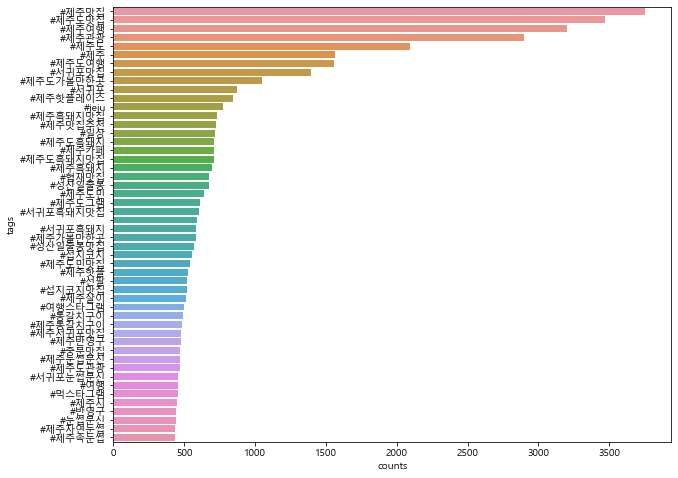

In [39]:
plt.figure(figsize=(10,8))
sns.barplot(x='counts', y='tags',data=jejuDf)

In [44]:
#= day 5 스타벅스

driver=webdriver.Chrome("chromedriver.exe")
url="https://www.starbucks.co.kr/store/store_map.do?disp=locale"
driver.get(url)


In [45]:

seoulBtn="#container > div > form > fieldset > div > section > article.find_store_cont > article > article > div.loca_step1 > div.loca_step1_cont > ul > li > a"
driver.find_element_by_css_selector(seoulBtn).click()

In [46]:

allBtn="#mCSB_2_container > ul > li:nth-child(1) > a"
driver.find_element_by_css_selector(allBtn).click()


In [47]:
html=driver.page_source
soup=BeautifulSoup(html, 'html.parser')

starbucksSoupList=soup.select("li.quickResultLstCon")

In [48]:
starBucksStore=starbucksSoupList[0]
starBucksStore

#매장이름
name=starBucksStore.select('strong')[0].text.strip()
#name
#위,경도
lat=starBucksStore['data-lat']
lon=starBucksStore['data-long']
#매장타입
storeType=starBucksStore.select("i")[0].text

#주소, 전화번호
#starBucksStore.select("p.result_details")[0].text

import re

# data =starbucksSoupList[0].select_one('p.result_details').text
# num = re.findall('[0-9]{4}-[0-9]{4}',data)
# add = re.sub(num[0],'',data)
# print(add)

#re.match("(\w+)(\d{4}-\d{4})", 

# sb_store = {}
# sb_store["address"], sb_store["tel"] = re.match("(\w+)(\d{4}-\d{4})", starbucksSoupList[0].select_one("p.result_details").text)


# 주소 
re.findall('[ㄱ-힣]+시 [ㄱ-힣]+구 [ㄱ-힣]+로 [0-9]{3,4}', soup.select('li.quickResultLstCon > p.result_details')[0].text.strip())
# 전화번호
re.findall('[0-9]{4}-[0-9]{4}', soup.select('li.quickResultLstCon > p.result_details')[0].text.strip())




['1522-3232']

In [49]:
#매장이름
#위도
#경도
#매장타입
#주소
#전화번호.


starBucksStore=starbucksSoupList[0]
print(starBucksStore)

#매장이름
name=starBucksStore.select('strong')[0].text.strip()
#name
#위,경도
lat=starBucksStore['data-lat']
lon=starBucksStore['data-long']
#매장타입
storeType=starBucksStore.select("i")[0].text


<li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">역삼아레나빌딩  </strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>


In [50]:
type(starBucksStore.select("p.result_details")[0])
#type(starBucksStore.select("p.result_details")[0])

type(str(starBucksStore.select("p.result_details")[0]))

str(starBucksStore.select("p.result_details")[0]).split("<br/>")

address=str(starBucksStore.select("p.result_details")[0]).split("<br/>")[0].split(">")[1]

#str(starBucksStore.select("p.result_details")[0]).split("<br/>")[1]
tel=str(starBucksStore.select("p.result_details")[0]).split("<br/>")[1].split("<")[0]

In [51]:
starbucksList=[]
for item in starbucksSoupList:
    #매장이름
    name=item.select('strong')[0].text.strip()
    #name
    #위,경도
    lat=item['data-lat']
    lon=item['data-long']
    #매장타입
    storeType=item.select("i")[0].text
    #전화번호, 주소
    address=str(item.select("p.result_details")[0]).split("<br/>")[0].split(">")[1]
    tel=str(item.select("p.result_details")[0]).split("<br/>")[1].split("<")[0]
    starbucksList.append([name, lat, lon, storeType, address, tel])

In [52]:
import numpy as np
# starbucksList[555]
np.shape(starbucksList)

len(starbucksList)
len(starbucksList[0])

6

In [53]:
#파이썬의 리스트는 데이터 분석에 적합하지 않은 자료구조

df=pd.DataFrame(starbucksList, 
                columns=['매장명','위도','경도','타입','주소','전화번호'])
df.to_excel("seoul_starbucks_list.xlsx", index=False)

In [55]:
sgg_pop_df=pd.read_csv("report.txt", sep="\t", header=2)
#csv(comma seperated values)파일 읽을때 사용되는 함수
#csv가 아닌 형식의 파일도 읽을 수 있음


In [56]:

cols = {
    '기간': 'GIGAN',
    '자치구': 'JACHIGU',
    '계': 'GYE_1',
    '계.1': 'GYE_2',
    '계.2': 'GYE_3',
    '남자': 'NAMJA_1',
    '남자.1': 'NAMJA_2',
    '남자.2': 'NAMJA_3',
    '여자': 'YEOJA_1',
    '여자.1': 'YEOJA_2',
    '여자.2': 'YEOJA_3',
    '세대': 'SEDAE',
    '세대당인구': 'SEDAEDANGINGU',
    '65세이상고령자': 'N_65SEISANGGORYEONGJA'
}



In [57]:
sgg_pop_df.columns
sgg_pop_df.rename(columns=cols, inplace=True)
# cols딕셔너리의 키('기간')에 해당되는 이름을 sgg_pop_df컬럼에서 찾아 해당 cols
# 딕셔너리('GIGAN')의 값으로 변경
sgg_pop_df

sgg_pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GIGAN                  26 non-null     object 
 1   JACHIGU                26 non-null     object 
 2   SEDAE                  26 non-null     object 
 3   GYE_1                  26 non-null     object 
 4   NAMJA_1                26 non-null     object 
 5   YEOJA_1                26 non-null     object 
 6   GYE_2                  26 non-null     object 
 7   NAMJA_2                26 non-null     object 
 8   YEOJA_2                26 non-null     object 
 9   GYE_3                  26 non-null     object 
 10  NAMJA_3                26 non-null     object 
 11  YEOJA_3                26 non-null     object 
 12  SEDAEDANGINGU          26 non-null     float64
 13  N_65SEISANGGORYEONGJA  26 non-null     object 
dtypes: float64(1), object(13)
memory usage: 3.0+ KB


In [58]:
sgg_pop_df['JACHIGU'] #JACHIGU 열 추출

#벡터화 연산:for문 없이 일괄적으로 연산(매우 빠름)
cond=sgg_pop_df['JACHIGU']!='합계' #JACHIGU 열 값이 합계와 다르면 True, 같으면 False

cond
sgg_pop_df[cond] #cond에 저장된 값이 True인 데이터만 출력
#불린참조 : 값이 True인 데이터만 출력

sgg_pop_df_selected=sgg_pop_df[sgg_pop_df['JACHIGU']!='합계']

sgg_pop_df_selected
sgg_pop_df_selected.info() #r에서는 str함수가 info()와 같음

sgg_pop_df_selected
#추출 대상 열이 2개 이상인 경우에는 반드시 대괄호로 묶어서 표현
sgg_pop_df_final=sgg_pop_df_selected[['JACHIGU','GYE_1']]

sgg_pop_df_final.columns=['시군구명', '주민등록인구']
sgg_pop_df_final.to_excel("sgg_pop.xlsx", index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 1 to 25
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GIGAN                  25 non-null     object 
 1   JACHIGU                25 non-null     object 
 2   SEDAE                  25 non-null     object 
 3   GYE_1                  25 non-null     object 
 4   NAMJA_1                25 non-null     object 
 5   YEOJA_1                25 non-null     object 
 6   GYE_2                  25 non-null     object 
 7   NAMJA_2                25 non-null     object 
 8   YEOJA_2                25 non-null     object 
 9   GYE_3                  25 non-null     object 
 10  NAMJA_3                25 non-null     object 
 11  YEOJA_3                25 non-null     object 
 12  SEDAEDANGINGU          25 non-null     float64
 13  N_65SEISANGGORYEONGJA  25 non-null     object 
dtypes: float64(1), object(13)
memory usage: 2.9+ KB


In [59]:
sgg_pop_df_final

,시군구명,주민등록인구
1,종로구,"159,842"
2,중구,"135,321"
3,용산구,"244,953"
4,성동구,"302,695"
5,광진구,"361,923"
6,동대문구,"358,679"
7,중랑구,"400,989"
8,성북구,"449,871"
9,강북구,"313,550"
10,도봉구,"329,300"


In [60]:
## day6 문법
#  

test="(()((())()))" #정상
test2="())(()" #비정상


cnt=0
for i in range(len(test2)):
    if cnt==-1:
        #print("비정상")
        break
    if test2[i]=='(': #여는 괄호를 만나면 cnt 증가
        cnt+=1
    elif test2[i]==')':#여는 괄호를 만나면 cnt 감소
        cnt-=1
if cnt==0:
    print("정상")
else:
    print("비정상")
        

비정상


In [61]:
a={'k':50}
b="korea"
print(b[0])

print(a[b[0]]) #합성함수             g(f(x))

k
50


In [63]:
# 스타벅스 
seoulStarbucks=pd.read_excel("seoul_starbucks_list.xlsx")
seoulStarbucks.head()


,매장명,위도,경도,타입,주소,전화번호
0,역삼아레나빌딩,37.501087,127.043069,리저브 매장 2번,서울특별시 강남구 언주로 425 (역삼동),1522-3232
1,논현역사거리,37.510178,127.022223,리저브 매장 2번,서울특별시 강남구 강남대로 538 (논현동),1522-3232
2,신사역성일빌딩,37.514132,127.020563,리저브 매장 2번,서울특별시 강남구 강남대로 584 (논현동),1522-3232
3,국기원사거리,37.499517,127.031495,리저브 매장 2번,서울특별시 강남구 테헤란로 125 (역삼동),1522-3232
4,스탈릿대치R,37.494668,127.062583,리저브 매장 2번,서울특별시 강남구 남부순환로 2947 (대치동),1522-3232


In [64]:
m=folium.Map(location=[37, 127])
# m

m.save("index.html")
folium.Map(location=[37, 127], zoom_start=13)

NameError: name 'folium' is not defined

In [ ]:

test = {'경도' : [127.061026,127.047883,127.899220,128.980455,127.104071,127.102490,127.088387,126.809957,127.010861,126.836078
                ,127.014217,126.886859,127.031702,126.880898,127.028726,126.897710,126.910288,127.043189,127.071184,127.076812
                ,127.045022,126.982419,126.840285,127.115873,126.885320,127.078464,127.057100,127.020945,129.068324,129.059574
                ,126.927655,127.034302,129.106330,126.980242,126.945099,129.034599,127.054649,127.019556,127.053198,127.031005
                ,127.058560,127.078519,127.056141,129.034605,126.888485,129.070117,127.057746,126.929288,127.054163,129.060972],     
        '위도' : [37.493922,37.505675,37.471711,35.159774,37.500249,37.515149,37.549245,37.562013,37.552153,37.538927,37.492388
              ,37.480390,37.588485,37.504067,37.608392,37.503693,37.579029,37.580073,37.552103,37.545461,37.580196,37.562274
              ,37.535419,37.527477,37.526139,37.648247,37.512939,37.517574,35.202902,35.144776,37.499229,35.150069,35.141176
              ,37.479403,37.512569,35.123196,37.546718,37.553668,37.488742,37.493653,37.498462,37.556602,37.544180,35.111532
              ,37.508058,35.085777,37.546103,37.483899,37.489299,35.143421],
     '구분' : ['음식','음식','음식','음식','생활서비스','음식','음식','음식','음식','음식','음식','음식','음식','음식','음식'
             ,'음식','음식','소매','음식','음식','음식','음식','소매','음식','소매','음식','음식','음식','음식','음식','음식'
             ,'음식','음식','음식','음식','소매','음식','음식','의료','음식','음식','음식','소매','음식','음식','음식','음식'
             ,'음식','음식','음식']}

In [ ]:
#pd.DataFrame() : 데이터프레임 생성
#딕셔너리로 데이터프레임 생성 결과 확인하면, 키->열이름, 값들은 해당 열의 데이터로 저장

df=pd.DataFrame(test)
df

latAvg=df['위도'].mean()
longAvg=df['경도'].mean()


In [ ]:
# wlw
m=folium.Map([latAvg, longAvg], zoom_start=9)
# m

for i in df.index:
    lat=df.loc[i,'위도']
    lon=df.loc[i,'경도']
    title=df.loc[i,'구분']
    folium.Marker([lat,lon], tooltip=title).add_to(m)